In [1]:
import cv2
import pandas as pd
import numpy as np

def preprocessing(val=True):
    
    data = pd.read_csv('data/x_train_gr_smpl.csv')
    labels = pd.read_csv('data/y_train_smpl.csv')

    if(val):
        ## ---------------- Data preparation ---------------- ##
        X_train = []
        for i in range(data.shape[0]):
            img = np.uint8(data.iloc[i])
            edited = cv2.Canny(img, 10, 30)
            edited = cv2.GaussianBlur(edited, (5, 5), 0)
            X_train.append(edited.reshape((1,-1))[0])

        data = pd.DataFrame(X_train)
        ## -------------------------------------------------- ##

    return data, labels

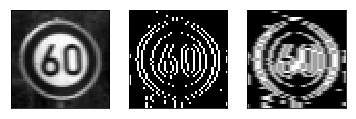

In [2]:
import matplotlib.pyplot as plt

df, _ = preprocessing(False)

i = 200
img = np.uint8(df.iloc[i])

canny = cv2.Canny(img, 10, 30)
blur = cv2.GaussianBlur(canny, (5, 5), 0)

#edited = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#edited = cv2.adaptiveThreshold(edited,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

img = img.reshape((48, 48))
canny = canny.reshape((48, 48))
blur = blur.reshape((48, 48))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(canny, 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(blur, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()